This is intended for people who want an example showing how to run Mascaret in an interactive mode with the help of the Python programming language.

# Import Mascaret as a Python module

In [1]:
import telapy.api.masc

The module 'telapy.api.masc' is located in the '$HOMETEL/scripts/python3/telapy/api' directory. If an error occurs while attempting to import, check the value of the environment variable PYTHONPATH.

# Creation of a model (instantiation)

The creation of a model consists in the creation of an instance and the Fortran memory allocation
The argument "iprint" indicates if listing file will be writing (iprint = 1) or not (iprint = 0)

In [2]:
from telapy.api.masc import Mascaret

# Creation of a model in the instance 1
masc = Mascaret()
masc.create_mascaret(iprint=1)
print('Instance #', masc.id_masc.value)

# Creation of another model in the instance 2
masc_2 = Mascaret()
masc_2.create_mascaret(iprint=0)
print('Instance #', masc_2.id_masc.value)

INFO:telapy.api.masc:Using MascaretApi


INFO:telapy.api.masc:Loading libmascaret.so...


INFO:telapy.api.masc:Library loaded.


INFO:telapy.api.masc:Using MascaretApi


INFO:telapy.api.masc:Loading libmascaret.so...


INFO:telapy.api.masc:Library loaded.


Instance # 1
Instance # 2


# Prepare path and files for simulation

In [3]:
# Changing of directory : 'examples' directory of the Telemac sources
import os
HOMETEL = os.environ.get('HOMETEL')
os.chdir(HOMETEL + '/examples/mascaret/2_Singular_Headloss')

# Mascaret files:
#  - files_name : list of file names needed for the simulation
#  - files_type : list of the extension of files (with same index)
# Warning : for listin file the extension is 'listing'
files_name = ['mascaret.xcas', 'geometrie', 'hydrogramme.loi',
              'limnigramme.loi', 'mascaret0.lis', 'mascaret0.opt',
              'init.lig']
files_type = ['xcas', 'geo', 'loi', 'loi', 'listing', 'res', 'lig']

# The two lists can be encapsulated in a single one
study_files = [files_name, files_type]

#  Mascaret files & import for second instance
files_name_2 = ['sarap.xcas', 'geometrie', 'hydrogramme.loi',
              'limnigramme.loi', 'mascaret0.lis', 'mascaret0.opt']
files_type_2 = ['xcas', 'geo', 'loi', 'loi', 'listing', 'res']
study_files_2 = [files_name_2, files_type_2]


# Import model from existing files

The method "import_model" reads the steering case and open input and output files

In [4]:
# import model 1
masc.import_model(study_files[0], study_files[1])

# import model 2
masc_2.import_model(study_files_2[0], study_files_2[1])

INFO:telapy.api.masc:Model imported with:
-> file_name: [b'mascaret.xcas', b'geometrie', b'hydrogramme.loi', b'limnigramme.loi', b'mascaret0.lis', b'mascaret0.opt', b'init.lig']
-> file_type: [b'xcas', b'geo', b'loi', b'loi', b'listing', b'res', b'lig'].


INFO:telapy.api.masc:Model imported with:
-> file_name: [b'sarap.xcas', b'geometrie', b'hydrogramme.loi', b'limnigramme.loi', b'mascaret0.lis', b'mascaret0.opt']
-> file_type: [b'xcas', b'geo', b'loi', b'loi', b'listing', b'res'].


# Initialization of the model

A Mascaret model in Python can be initialize : 
 - from Lidop file (.lig) with "init_hydro_from_file" method 
 - with lists for Q (discharge) and Z (free surface elevation) at T=0 with "init_hydro" method

This second way to initialize the model is the occasion to introduce the method "get_var_size" which is returning the size of a variable for every dimension of the variable (max 3 dimensions).

In [5]:
# Initialization with init_hydro_from_file
masc.init_hydro_from_file('init.lig')

# Initialization of the second instance with init_hydro
npoin_2 = masc_2.get_var_size('Model.X')[0]
print(npoin_2)
print("Number of sections in model #2 :", npoin_2, "\n")
help(masc_2.get_var_size)

z_val = [0.]*npoin_2
q_val = [0.]*npoin_2
masc_2.init_hydro(z_val, q_val)

help(masc_2.init_hydro)

500
Number of sections in model #2 : 500 

Help on method get_var_size in module telapy.api.masc:

get_var_size(var_name, index=0) method of telapy.api.masc.Mascaret instance
    Get the size(s) of a Mascaret variable
    
    Use Mascaret Api :meth:`C_GET_TAILLE_VAR_MASCARET`
    
    @param var_name (str) name of the Mascaret variable
    @param index (int) only for cross-sections, graphs, weirs,
                      junctions, storage areas
    @return (int, int, int) sizes

Help on method init_hydro in module telapy.api.masc:

init_hydro(z_val, q_val) method of telapy.api.masc.Mascaret instance
    Initialize the model from hydraulic values
    
    Mascaret Api :meth:`C_INIT_LIGNE_MASCARET`
    
    @param z_val (list or array) water levels (m)
    @param q_val (list or array) discharges (m3/s)



# Get the number of time steps

In [6]:
help(masc.get)

Help on method get in module telapy.api.masc:

get(varname, i=0, j=0, k=0) method of telapy.api.masc.Mascaret instance
    Get the value of a variable of Mascaret
    
    @param varname (str) Name of the variable
    @param i (int) index on first dimension
    @param j (int) index on second dimension
    @param k (int) index on third dimension
    
    @return scalar value



In [7]:
number_of_time_steps = masc.get('Model.MaxNbTimeStep', 1, 0, 0)
print("Number of time steps in model #1 :", number_of_time_steps)

Number of time steps in model #1 : 2000


# Simulation and extract results

## 1.1 model #2 : Steady state computation with one step

In [8]:
masc_2.compute(0., 1., 1.)

## 1.2 model #2 : Get some results and draw them in a graph

In [9]:
z_res, q_res = masc_2.get_hydro()

x_2 = []

for i in range(npoin_2):
    x_2.append(masc.get('Model.X', i, 1, 0))


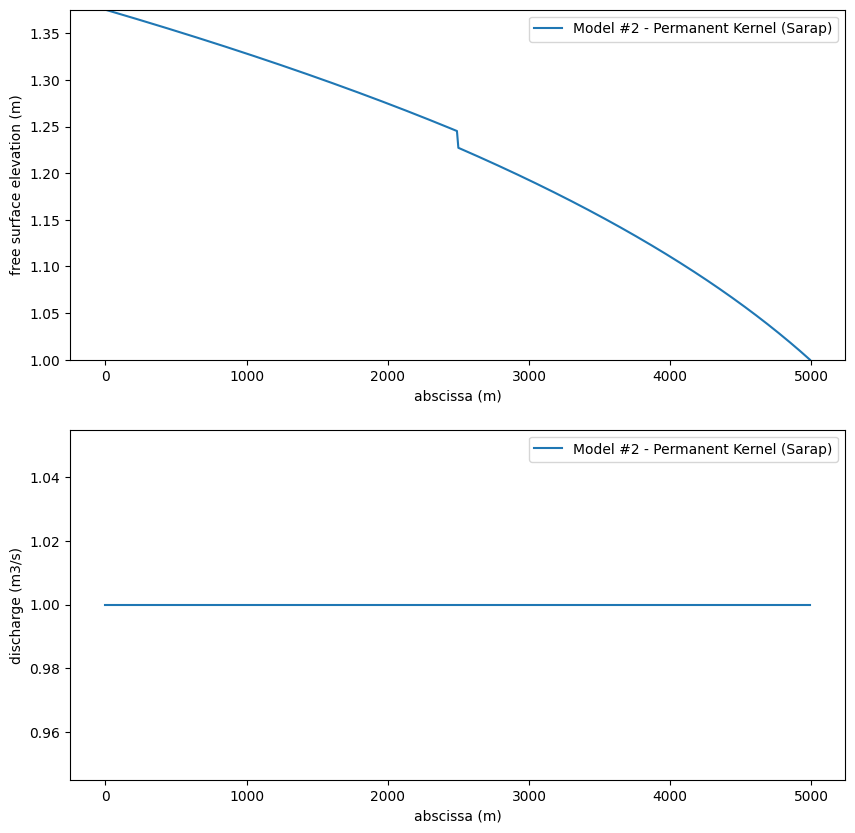

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
from postel.plot1d import plot1d

#Initialising figure
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

plot1d(ax1, x_2, z_res, 
       x_label='abscissa (m)',
       y_label='free surface elevation (m)', 
       plot_label='Model #2 - Permanent Kernel (Sarap)')

plot1d(ax2, x_2, q_res, 
       x_label='abscissa (m)',
       y_label='discharge (m3/s)', 
       plot_label='Model #2 - Permanent Kernel (Sarap)')

ax1.set_ylim(min(z_res), max(z_res))

# Displaying legend
ax1.legend()
ax2.legend()

# Showing figure
plt.show()

del(masc_2)

## 2. model #1 : Computation with loop and dynamic extraction

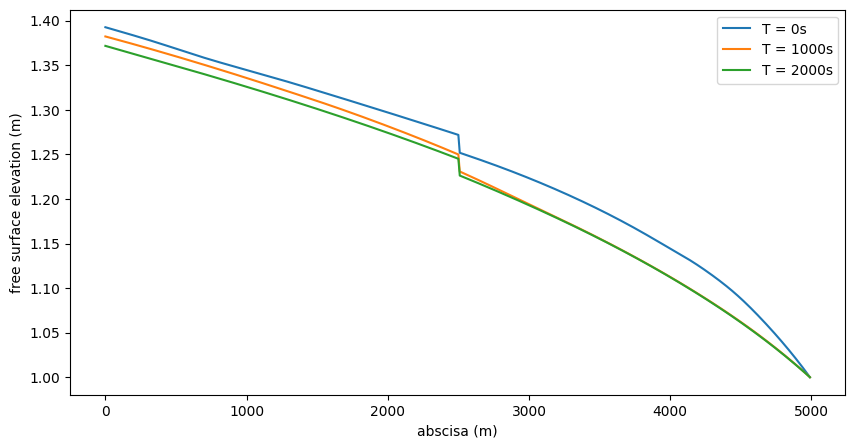

In [11]:
# Steady state computation with one step
output_freq = 1000
T_init = 0
T_end = output_freq

npoin = masc.get_var_size('Model.X')[0]

X_1 = []
for i in range(npoin):
    X_1.append(masc.get('Model.X', i, 1, 0))


long_profiles = []
times = []
for i in range(0, number_of_time_steps + 1, output_freq):
    long_profile = []
    masc.compute(T_init, T_end, 1.)
    for j in range(npoin):
        long_profile.append(masc.get('State.Z', j, 1, 0))
    T_init = T_end
    T_end += output_freq
    long_profiles.append(long_profile)
    times.append(i)

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))
    
for i, profile in enumerate(long_profiles):
    plot1d(ax, X_1, profile, 
           x_label='abscisa (m)',
           y_label='free surface elevation (m)', 
           plot_label='T = {}s'.format(times[i]))

# Displaying legend
ax.legend()

# Showing figure
plt.show()

del(plt)
del(masc)